## ETC Plot ##

In [1]:
# Import required modules
import sys
from pathlib import Path

In [2]:
# import project root into modules
project_root = str(Path.cwd().resolve().parent)
if project_root not in sys.path:
    sys.path.append(project_root)

In [3]:
from src.analysis import etc_plot
from src.utilities import load_and_preprocess_jobs
from src.config import enum_constants

# Automatically reload modules before executing code
%load_ext autoreload
# Reload all modules imported with %aimport every time before executing the Python code typed.
%autoreload 1
%aimport src.analysis.etc_plot, src.config.enum_constants, src.analysis.efficiency_analysis

In [4]:
# load jobs df
loaded_df = load_and_preprocess_jobs(db_path="../data/slurm_data.db")

Connected to ../data/slurm_data.db
Fetched and saved partition_info.json from remote URL.
[Preprocessing] Running with new database format: GPU types as dictionary.
[Preprocessing] Running with new database format: GPU types as dictionary.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/utilities/load_and_preprocess_jobs.py:90: UserWarning: 6545 duplicate JobIDs detected. Keeping only the latest entry for each JobID.
  processed_data = preprocess_data(jobs_df, apply_filter=False)


Found 42 records with errors. Reporting them to a summary file /Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/data/preprocessing/preprocessing_errors.log.
Processing error log file already exists. Overwriting preprocessing_errors.log
Disconnected from ../data/slurm_data.db


In [5]:
# initilize the ROCVisualizer instance
etc_instance = etc_plot.ETCVisualizer(jobs_df=loaded_df)


# filter to drop invalid entries (GPUType is null although we filtered out all CPU-only jobs)
invalid_mask = (loaded_df["GPUType"].isna())
filtered_df = loaded_df[~invalid_mask].copy()
# calcualted dataframe with metrics
etc_instance.calculate_all_efficiency_metrics(filtered_df)
print(len(loaded_df) - len(filtered_df))



39


#### Job Plots ####

/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/etc_plot.py:582: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ETC plot (Jobs) for proportion of vram_hours by threshold alloc_vram_efficiency\n Total vram_hours: 2.6e+08 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

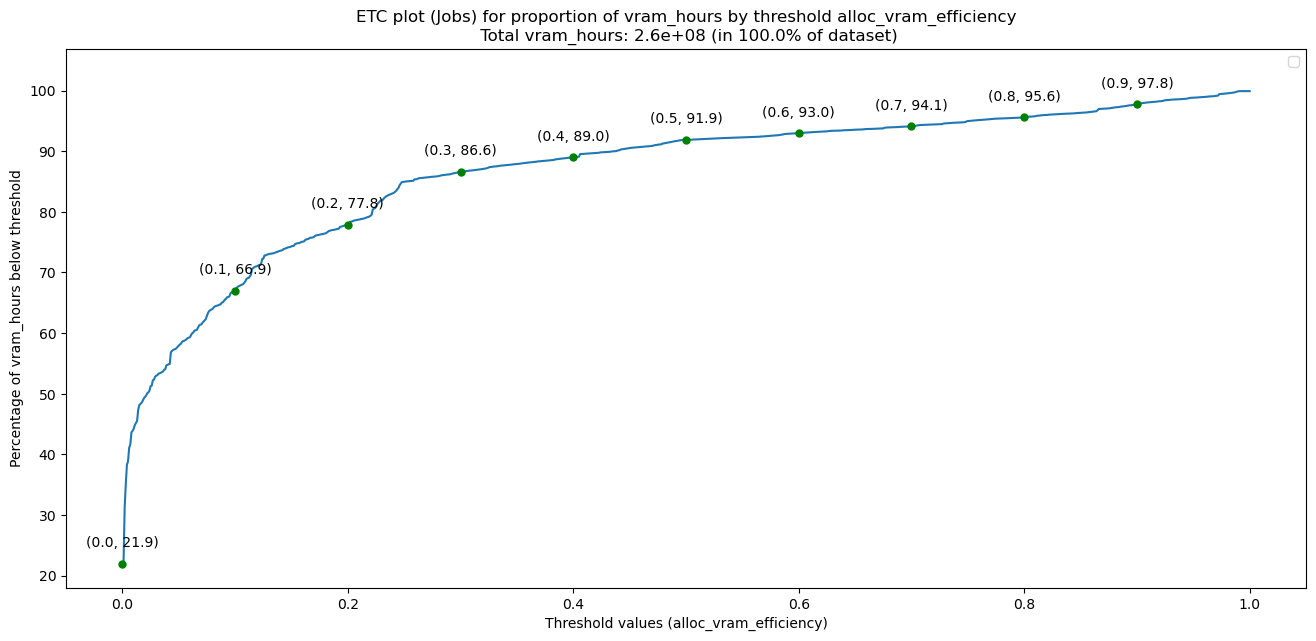

In [6]:
type = enum_constants.ETCPlotTypes.JOB
threshold_metric = enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY
proportion_metric = enum_constants.ProportionMetricsEnum.VRAM_HOURS

etc_instance.plot_etc(plot_type=type, 
                    threshold_metric=threshold_metric,
                    min_threshold=0, 
                    max_threshold=1.0,
                    threshold_step=0.001,
                    proportion_metric=proportion_metric)

#### Inspect Job plots for vram_constraint_efficiency with null set to 11gb or not ####

#### User plots ####

Filtered out 241 invalid records based on avg_alloc_vram_efficiency_score column.
Setting min_threshold to -1083110.355128409 based on data.


/Users/letan/Desktop/TAN/Other Working info/REU/main/ds4cg-job-analytics/src/analysis/etc_plot.py:582: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axe.legend()


(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ETC plot (Users) for proportion of User by threshold avg_alloc_vram_efficiency_score\n Total User: 781.0 (in 76.4% of aggregated User dataset)'}, xlabel='Threshold values (avg_alloc_vram_efficiency_score)', ylabel='Percentage of User below threshold'>])

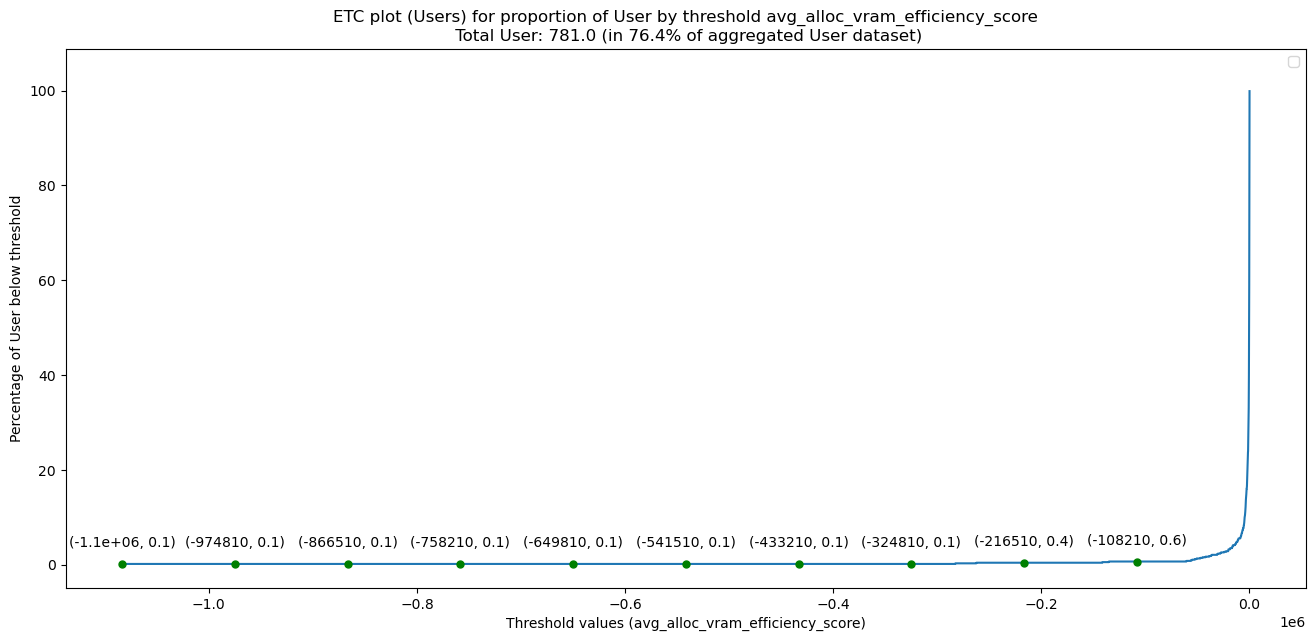

In [7]:
type = enum_constants.ETCPlotTypes.USER
threshold_metric = enum_constants.UserEfficiencyMetricsEnum.AVG_ALLOC_VRAM_EFFICIENCY_SCORE
proportion_metric = enum_constants.ProportionMetricsEnum.USERS

etc_instance.plot_etc(plot_type=type, 
                    threshold_metric=threshold_metric,
                    max_threshold=1.0,
                    threshold_step=100,
                    proportion_metric=proportion_metric)

#### PI plots ####

(<Figure size 1600x700 with 1 Axes>,
 [<Axes: title={'center': 'ETC plot (PI Group) for proportion of Account by threshold vram_hours\n Total Account: 305.0 (in 100.0% of aggregated PI Group dataset)'}, xlabel='Threshold values (vram_hours)', ylabel='Percentage of Account below threshold'>])

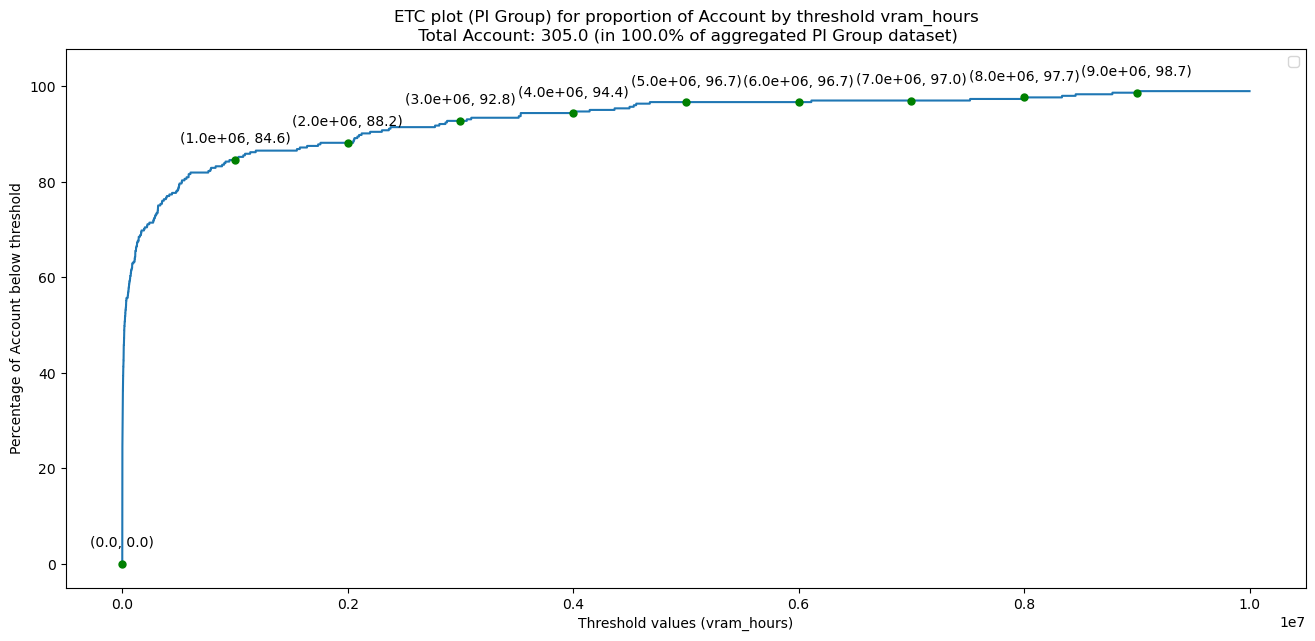

In [8]:
type = enum_constants.ETCPlotTypes.PI_GROUP
threshold_metric = enum_constants.PIEfficiencyMetricsEnum.VRAM_HOURS
proportion_metric = enum_constants.ProportionMetricsEnum.PI_GROUPS

etc_instance.plot_etc(plot_type=type, 
                    threshold_metric=threshold_metric,
                    min_threshold=0, 
                    max_threshold=10000000,
                    threshold_step=100,
                    proportion_metric=proportion_metric)

#### Multiple line Plot ####

##### Mutliple line plot for users with highest job counts #####

In [ ]:
pi_df = etc_instance.users_with_efficiency_metrics

# Get top users with highest job count
top_pi_with_vram_hours = pi_df.sort_values(enum_constants.UserEfficiencyMetricsEnum.JOBS.value, ascending=False)
top_5_user_lists = top_pi_with_vram_hours.head(5)["User"].to_list()

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ETC plot (USER) for proportion of vram_hours by threshold alloc_vram_efficiency\n Total vram_hours: 2.6e+08 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Percentage of vram_hours below threshold'>])

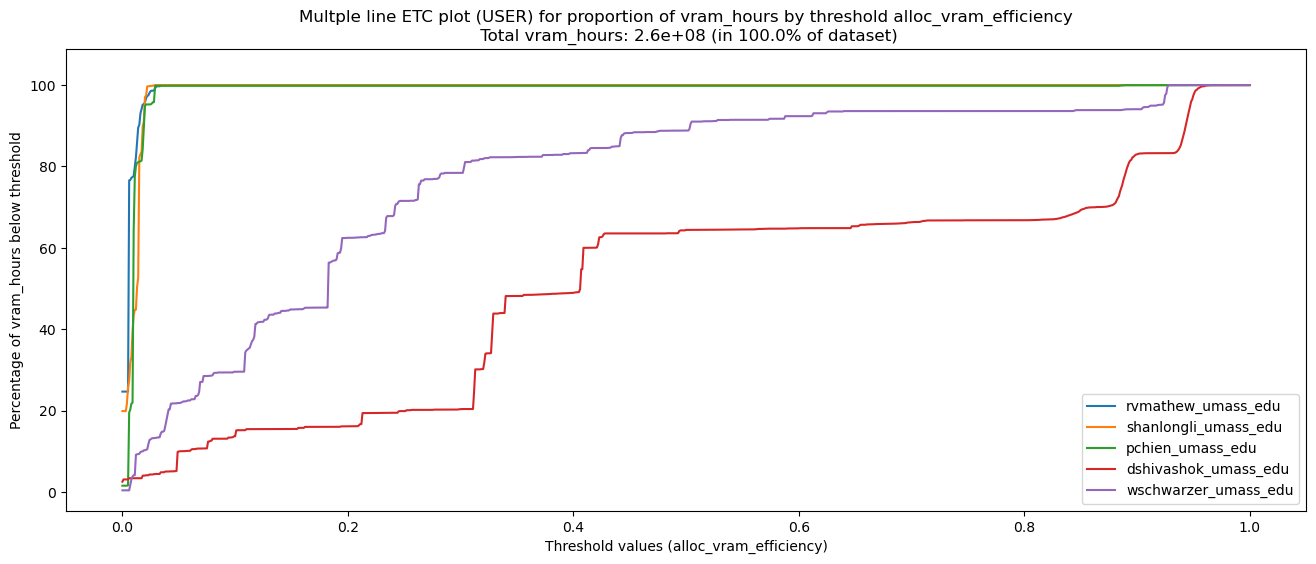

In [17]:
etc_instance.multiple_line_etc_plot(
                                    object_column_type=enum_constants.ETCPlotTypes.USER,
                                    plot_object_list=top_5_user_lists,
                                    threshold_metric=enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY, 
                                    min_threshold=0,
                                    max_threshold=1.0,
                                    threshold_step=0.001,
                                    proportion_metric=enum_constants.ProportionMetricsEnum.VRAM_HOURS,
                                    plot_percentage=True
                                    )

##### Mutliple line plot for pi groups with highest vram hours #####

In [23]:
pi_df = etc_instance.pi_accounts_with_efficiency_metrics

# Get top users with highest job count
top_pi_with_vram_hours = pi_df.sort_values(enum_constants.PIEfficiencyMetricsEnum.VRAM_HOURS.value, ascending=False)
top_5_pi_lists = top_pi_with_vram_hours.head(5)[enum_constants.ProportionMetricsEnum.PI_GROUPS.value].to_list()

(<Figure size 1600x600 with 1 Axes>,
 [<Axes: title={'center': 'Multple line ETC plot (PI_GROUP) for amounts of vram_hours by threshold alloc_vram_efficiency\n Total vram_hours: 2.6e+08 (in 100.0% of dataset)'}, xlabel='Threshold values (alloc_vram_efficiency)', ylabel='Count of vram_hours below threshold'>])

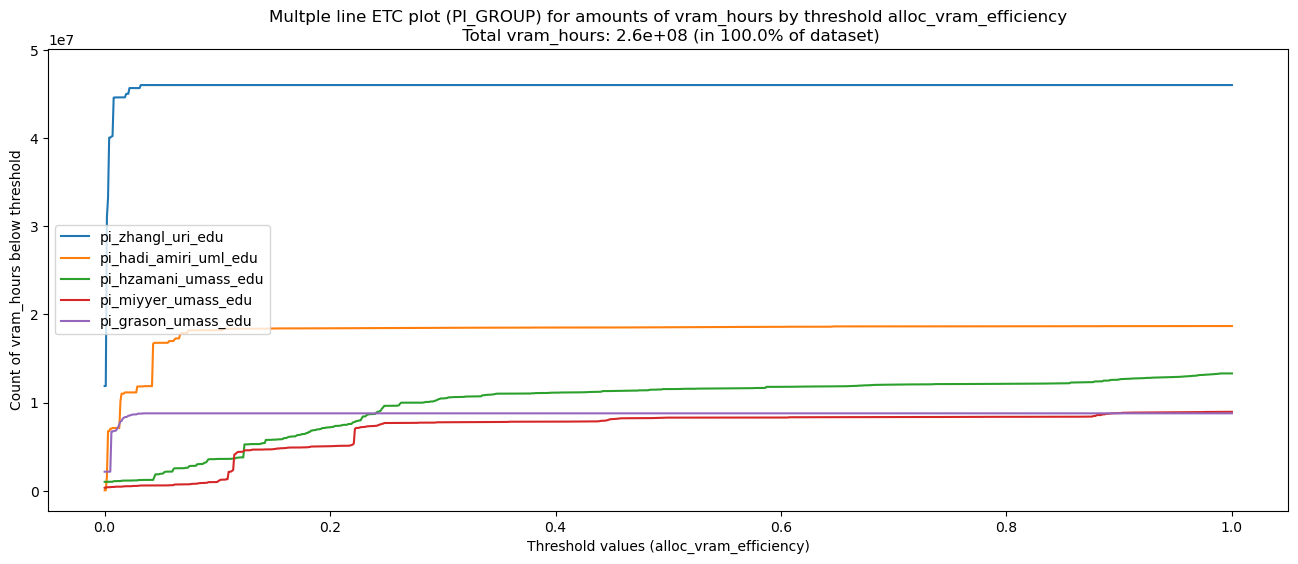

In [24]:
etc_instance.multiple_line_etc_plot(
                                    object_column_type=enum_constants.ETCPlotTypes.PI_GROUP,
                                    plot_object_list=top_5_pi_lists,
                                    threshold_metric=enum_constants.JobEfficiencyMetricsEnum.ALLOC_VRAM_EFFICIENCY, 
                                    min_threshold=0,
                                    max_threshold=1.0,
                                    threshold_step=0.001,
                                    proportion_metric=enum_constants.ProportionMetricsEnum.VRAM_HOURS,
                                    plot_percentage=False
                                    )